<a href="https://colab.research.google.com/github/AkshajBharadwaj/nba_stats/blob/main/nba_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear and Lasso Regression Models

The purpose of the project is to attempt to predict Points Per Game given a handful of common player evaluation metrics.

In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import math


In [ ]:
# Reading in CSV dataset, remove columns for categorical data, and data that is factored into points
# PTS = Points Per Game

df = pd.read_csv('nba_stats.csv', encoding="ISO-8859-1", sep=';').drop(columns=["Rk", "Pos", "Tm", "FG", "FGA", "2P", "3P", "2PA", "3PA", "FT", "FTA"])
df = df[df["G"] > 0] # Remove players who have not played any games
df.head(5)


,Player,Age,G,GS,MP,FG%,3P%,2P%,eFG%,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,22,73,28,23.6,0.439,0.359,0.468,0.486,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,Steven Adams,28,76,75,26.3,0.547,0.000,0.548,0.547,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,Bam Adebayo,24,56,56,32.6,0.557,0.000,0.562,0.557,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,Santi Aldama,21,32,0,11.3,0.402,0.125,0.560,0.424,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,LaMarcus Aldridge,36,47,12,22.3,0.550,0.304,0.578,0.566,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9


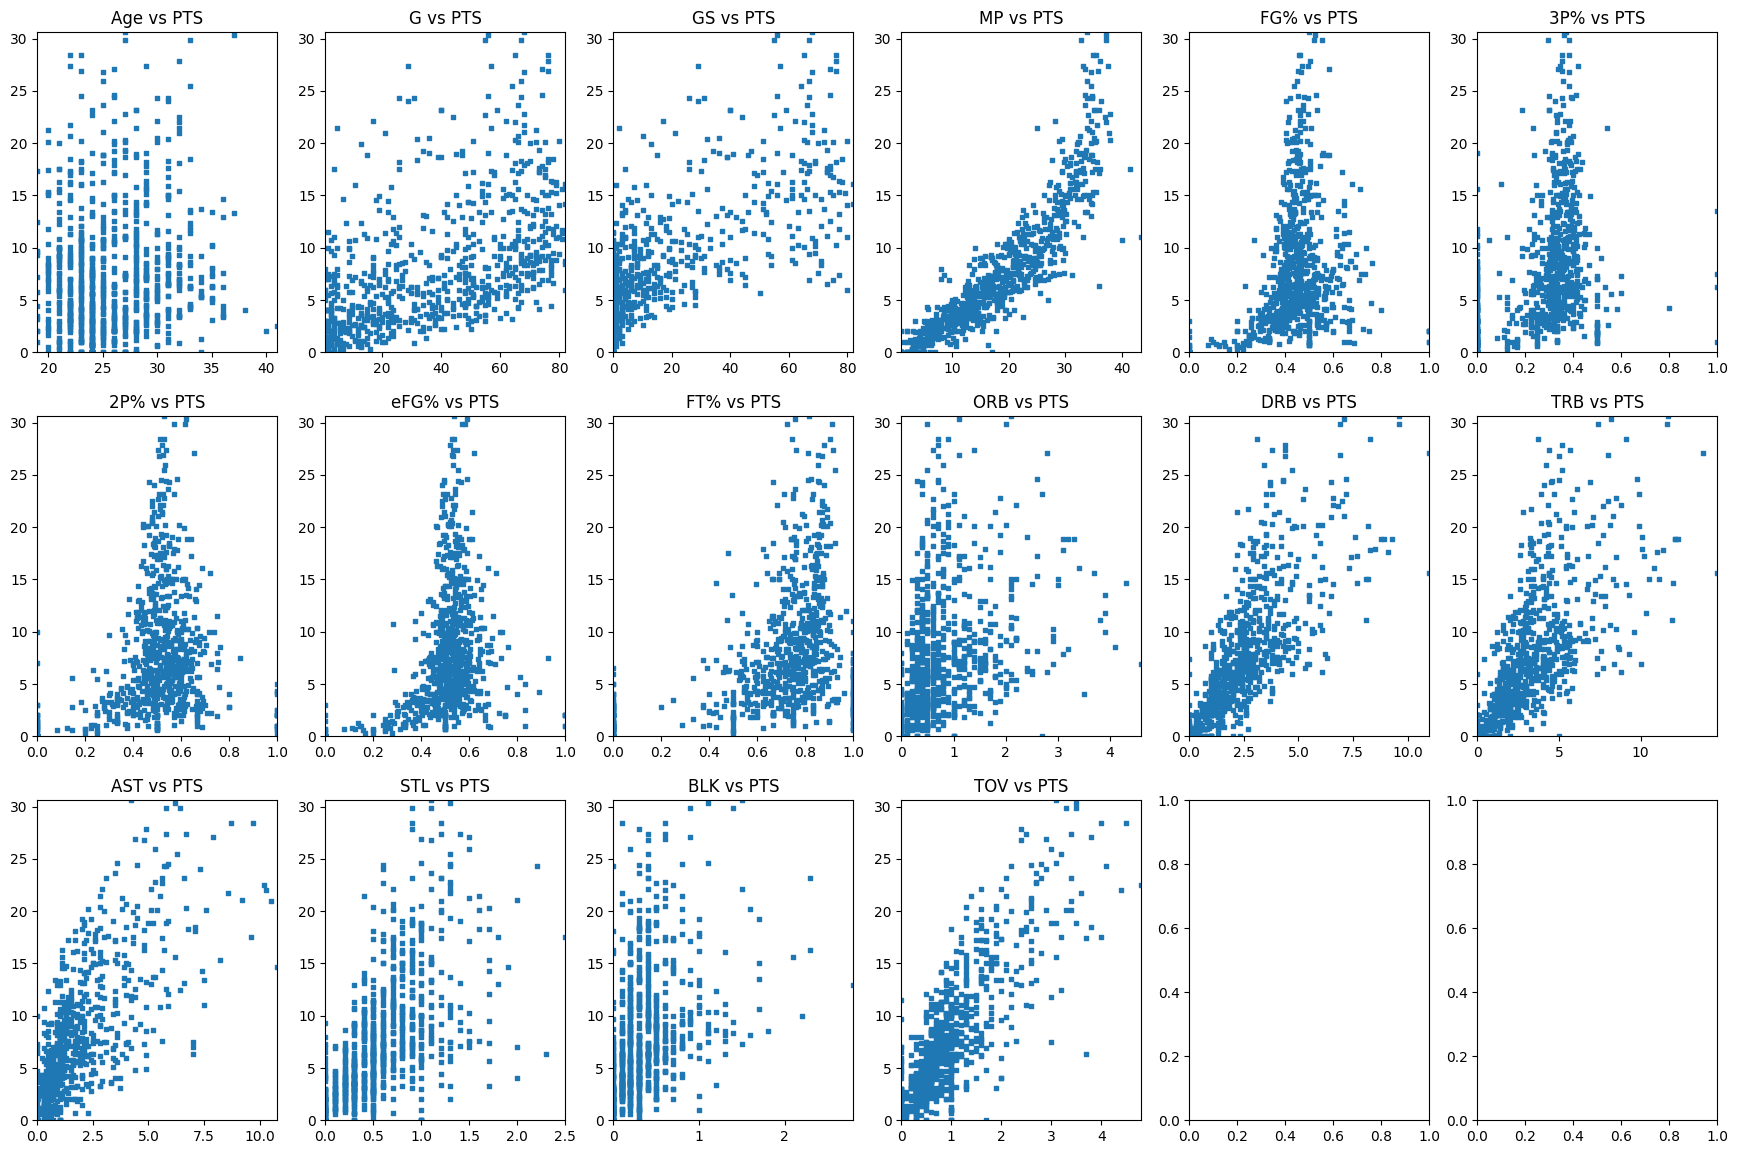

In [ ]:
# Plotting relationships

fig, ax = plt.subplots(nrows=3, ncols=6, figsize = (24,16))

i = 1 # Start from 2nd column (Age)
for row in range(6):
    for col in range(6):
      if (i<len(df.columns) and i <17):
        plot_title = f'{df.columns[i]} vs PTS'
        ax[row, col].scatter(x=df[df.columns[i]], y=df["PTS"], marker = 's', s=5)
        ax[row, col].set_title(plot_title)
        ax[row, col].set_xlim([df[df.columns[i]].min(), df[df.columns[i]].max()])
        ax[row, col].set_ylim([df["PTS"].min(), df["PTS"].max()])
        fig.subplots_adjust(bottom=0.2, left=0.2)
      i+=1
plt.show()


In [ ]:
subset = df.iloc[:, 1:19]

# Compute the R-squared value between each column and the final column "PTS"
rsquared_values = (subset.corr()['PTS'] ** 2).drop('PTS')


drop_columns = rsquared_values[rsquared_values < 0.4].index

df1 = df.drop(columns=drop_columns) # Drop the columns that have an R-squared value lower than 0.4

['GS' 'MP' 'DRB' 'TRB' 'AST' 'TOV' 'PF']


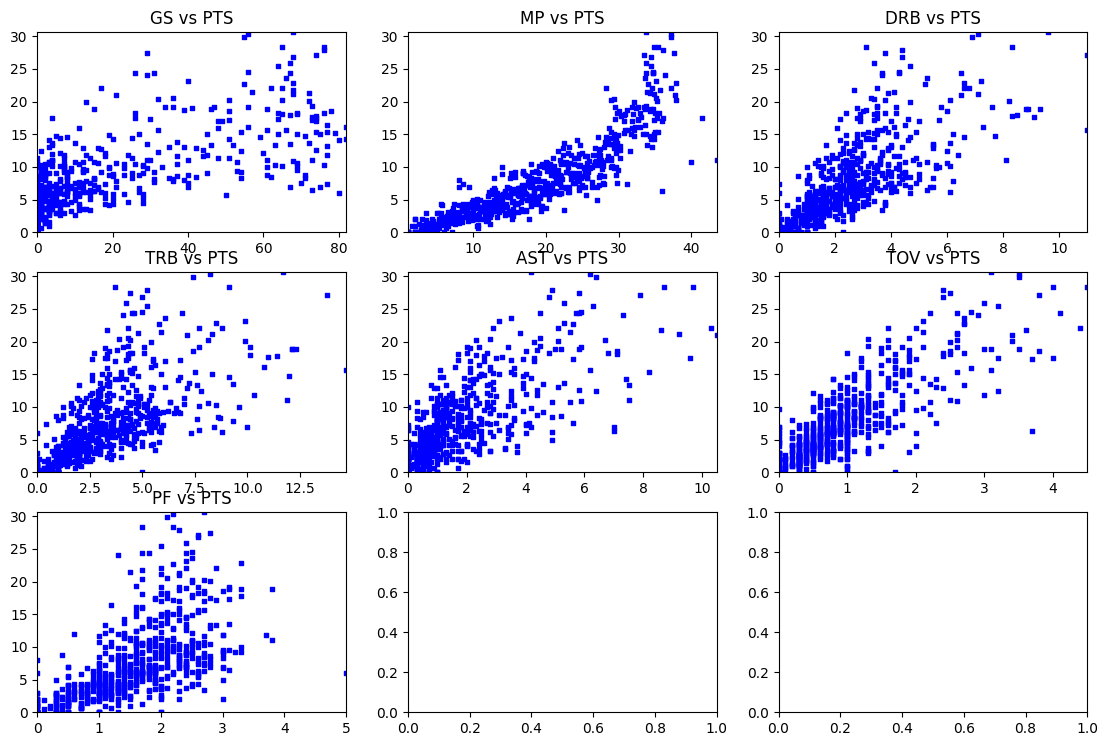

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize = (15,10))

# Split data into train & test
X = df1[df1.columns.values[1:8]] # Selecting features
Y = df1[['PTS']]
print(df1.columns.values[1:8])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=99)

# Plot new relationships (rsquared > 0.4)
i = 0
for row in range(3):
    for col in range(3):
      if (i<len(X_train.columns) and i <8):
        plot_title = f'{X_train.columns[i]} vs PTS'
        ax[row, col].scatter(x=X_train[X_train.columns[i]], y=Y_train["PTS"], marker = 's', s=5, c = "blue")
        ax[row, col].set_title(plot_title)
        ax[row, col].set_xlim([X_train[X_train.columns[i]].min(), X_train[X_train.columns[i]].max()])
        ax[row, col].set_ylim([Y_train["PTS"].min(), Y_train["PTS"].max()])
        fig.subplots_adjust(bottom=0.2, left=0.2)
      i+=1
plt.show()

In [ ]:
# Create and evaluate model with LinearRegression

reg = LinearRegression().fit(X_train, Y_train)
r_squared = r2_score(Y, reg.predict(X))
print("R^2: \n",r_squared)
print("Intercept: \n",reg.intercept_)
print("Coefficients: ")
print(reg.coef_)
for i in range(len(X_train.columns)):
    print(X_train.columns[i], ":", reg.coef_[0][i])
print(reg.coef_)
print("Train Score: \n" + str(reg.score(X_train, Y_train)))
print("Test Score: \n" + str(reg.score(X_test, Y_test)))


R^2: 
 0.8479230716752421
Intercept: 
 [-0.98621692]
Coefficients: 
[[ 0.02726027  0.3486152   1.23575983 -0.59198097 -0.16868231  2.56638181
  -0.91292718]]
GS : 0.027260273675580524
MP : 0.3486151965637133
DRB : 1.235759828304111
TRB : -0.5919809694704199
AST : -0.16868230618521876
TOV : 2.566381812650894
PF : -0.912927181395514
[[ 0.02726027  0.3486152   1.23575983 -0.59198097 -0.16868231  2.56638181
  -0.91292718]]
Train Score: 
0.8517858776019438
Test Score: 
0.8340141530589741


In [ ]:
# Create and evaluate model with Lasso
X = df[df.columns.values[1:-1]] # Using original dataset without dropped values (rsq < 0.4) since Lasso will handle unused variables
Y = df[['PTS']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=99)
lasso = Lasso(alpha=0.12102695990619497)
lasso.fit(X_train, Y_train)
train_score = lasso.score(X_train, Y_train)
test_score = lasso.score(X_test, Y_test)
num_coeffs_used = np.sum(lasso.coef_ != 0)
lasso_cv = LassoCV(alphas=None, cv=10, max_iter=100000)
lasso_cv.fit(X_train, Y_train)

print("Optimal alpha:", lasso_cv.alpha_)
print("R^2: \n",r_squared)

print('Train score:', train_score)
print('Test score:', test_score)
print('Number of non-zero coefficients used:', num_coeffs_used)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimal alpha: 0.10208379087419071
R^2: 
 0.8479230716752421
Train score: 0.8464702957102873
Test score: 0.8410758456724389
Number of non-zero coefficients used: 9
